In [33]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

plt.rcParams['font.family']     = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
import numpy as np 
# set the style of the axes and the text color
#plt.rcParams["axes.labelweight"] = "bold"
#plt.rcParams["font.weight"] = "bold"
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=1.5
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'
csfont = {'fontname':'Arial','fontsize':25}
tickfont = {'fontname':'Arial','fontsize':16}

In [34]:
excelsheet = pd.ExcelFile('/anvil/projects/x-cis220051/corporate/molecular-stethoscope/Teams/Team-2/ClusterMarkers_1819ADcohort-Copy1.congregated_DR.xlsx')
# Get Sheets
Phenotype = excelsheet.parse(excelsheet.sheet_names[0])
TPMs = excelsheet.parse(excelsheet.sheet_names[-1])
TPMs = TPMs[~TPMs.Coeff.isna()]
Coeff = TPMs['Coeff'].values
Phenotype = Phenotype.dropna()
Phenotype = Phenotype.set_index('Isolate ID')

df = pd.read_csv('../data/AD_sort_by_AD_over_NCI_v3_pop.csv')
df = df.set_index('Unnamed: 0')
df = df.sort_index()

genes = TPMs.gene_id.str.split('.',expand=True)
genes = genes.iloc[:,0]
TPMs['gene_id'] = genes
TPMs = TPMs.set_index('gene_id')
TPMs = TPMs.sort_index()
TPMs = TPMs.loc[df.index.tolist(),:]
tmp = TPMs.reset_index()
tmp = tmp.drop(['gene_id','Description', 'ORI', 'MIN', 'MAX', 'AVG', 'Coeff'],axis = 1)
tmp = tmp.dropna(axis = 1)
TPMs

,11174-r1,11178-r1,11182-r1,11182-r2,11186-r1,11186-r2,11190-r1,11190-r2,11194-r1,11194-r2,...,MIN,MAX,AVG,Coeff,Unnamed: 345,Unnamed: 346,Unnamed: 347,Unnamed: 348,Unnamed: 349,Unnamed: 350
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000002016,4.820144,12.776590,4.833834,8.161646,3.169127,0.000000,6.839473,10.681153,5.691065,3.995152,...,0.000000,84.652866,6.333572,-0.007079,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000003147,51.791446,33.180416,63.530392,43.968699,23.892951,47.149213,38.821072,24.922689,34.949282,22.000553,...,2.887443,136.348384,37.229801,-0.023359,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000004487,16.205225,23.230163,22.843765,19.553221,24.232501,23.562878,23.943806,24.934363,29.813154,34.290817,...,11.628547,78.419699,27.525932,-0.049431,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000004766,10.995954,14.454324,9.678806,13.023904,15.200490,6.943367,19.546195,8.346474,8.879007,11.321413,...,0.000000,50.501847,16.517895,-0.009210,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000004809,0.000000,4.026562,5.724864,2.361668,3.565267,2.779692,3.753231,0.000000,2.030837,4.768056,...,0.000000,42.394783,3.996359,-0.166043,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000275714,126.892809,148.634328,137.329897,72.783362,153.329139,108.267259,268.683873,136.298510,190.520815,207.617290,...,0.000000,610.384196,144.783301,0.070186,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000276231,3.753185,0.000000,1.191752,3.507771,12.461459,2.287089,1.356590,2.988388,0.649395,2.362256,...,0.000000,33.940451,3.879551,0.049492,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000276410,243.831518,225.551979,116.958739,77.309892,125.056002,87.542717,134.867615,91.029101,198.620547,281.043183,...,0.000000,517.030530,159.188740,-0.036552,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df

,Description,Coef,AD average TPM,NCI average TPM,AD Coefficent * TPM,NCI coefficent * TPM,AD/NCI
Unnamed: 0,,,,,,,
ENSG00000002016,RAD52,-0.007079,5.21,6.60,0.0,0.0,0.79
ENSG00000003147,ICA1,-0.023359,37.08,42.21,-0.9,-1.0,0.88
ENSG00000004487,KDM1A,-0.049431,27.67,30.87,-1.4,-1.5,0.90
ENSG00000004766,VPS50,-0.009210,15.54,17.37,-0.1,-0.2,0.89
ENSG00000004809,SLC22A16,-0.166043,2.70,4.32,-0.4,-0.7,0.63
...,...,...,...,...,...,...,...
ENSG00000275714,HIST1H3A,0.070186,146.21,120.77,10.3,8.5,1.21
ENSG00000276231,PIK3R6,0.049492,3.80,4.15,0.2,0.2,0.92
ENSG00000276410,HIST1H2BB,-0.036552,168.82,165.50,-6.2,-6.0,1.02


No handles with labels found to put in legend.


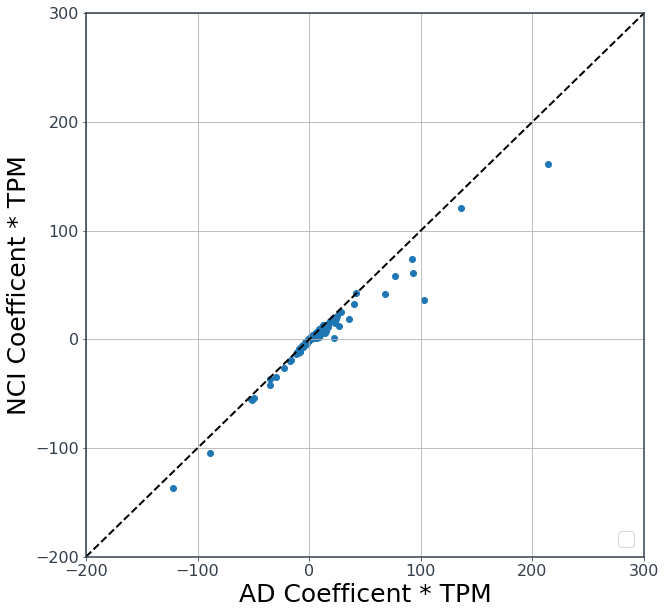

In [36]:
fig,ax = plt.subplots(figsize=(10,10))

plt.scatter(df['AD Coefficent * TPM'],df['NCI coefficent * TPM'])
plt.yticks(**tickfont)
plt.xticks(**tickfont)
plt.xlabel('AD Coefficent * TPM',**csfont)
plt.ylabel('NCI Coefficent * TPM',**csfont)
plt.grid()
plt.plot([-200,300],[-200,300],'--k',linewidth = 2)
plt.legend(loc=4,fontsize = 20)
plt.xlim([-200,300])
plt.ylim([-200,300])

plt.show()

In [37]:
differences = []

for i in np.arange(100,850,20):
    beta1 = set(df['AD Coefficent * TPM'].nsmallest(i).index.tolist())
    beta2 = set(df['NCI coefficent * TPM'].nsmallest(i).index.tolist())
    differences += [len(beta1.difference(beta2))]


No handles with labels found to put in legend.


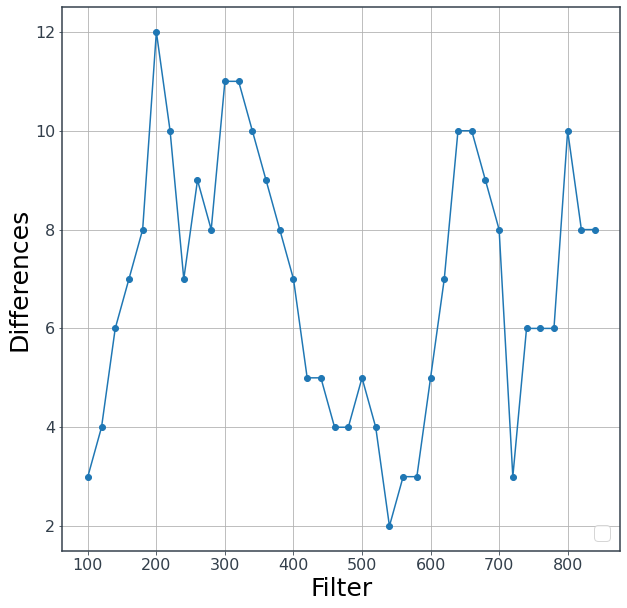

In [38]:
fig,ax = plt.subplots(figsize=(10,10))

plt.plot(np.arange(100,850,20),differences,'-o')
plt.yticks(**tickfont)
plt.xticks(**tickfont)
plt.xlabel('Filter',**csfont)
plt.ylabel('Differences',**csfont)
plt.grid()
#plt.plot([-200,300],[-200,300],'--k',linewidth = 2)
plt.legend(loc=4,fontsize = 20)
#plt.xlim([-200,300])
#plt.ylim([-200,300])

plt.show()